# Exploratory Data Analysis Starter

## Import packages

In [1]:
# !pip install matplotlib
# !pip install seaborn 
# !pip install pandas

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set_theme(color_codes=True)


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

25 feature in the client dataset


In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


7 features in the price dataset

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe(include='all')

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,14606,14606,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,...,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606,14606.000000,14606.000000
unique,14606,8,NaN,NaN,NaN,1796,368,2129,386,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,NaN,NaN,NaN,2009-08-01,2016-02-01,2015-11-01,2015-06-23,NaN,...,f,NaN,NaN,NaN,NaN,NaN,NaN,lxidpiddsbxsbosboudacockeimpuepw,NaN,NaN
freq,1,6754,NaN,NaN,NaN,95,145,721,587,NaN,...,11955,NaN,NaN,NaN,NaN,NaN,NaN,7097,NaN,NaN
mean,NaN,NaN,1.592203e+05,2.809238e+04,16090.269752,NaN,NaN,NaN,NaN,1868.614880,...,NaN,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,NaN,18.135136,0.097152
std,NaN,NaN,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,...,NaN,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,NaN,13.534743,0.296175
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,0.000000,...,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,3.300000,0.000000
25%,NaN,NaN,5.674750e+03,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,494.995000,...,NaN,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,NaN,12.500000,0.000000
50%,NaN,NaN,1.411550e+04,0.000000e+00,792.500000,NaN,NaN,NaN,NaN,1112.875000,...,NaN,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,NaN,13.856000,0.000000
75%,NaN,NaN,4.076375e+04,0.000000e+00,3383.000000,NaN,NaN,NaN,NaN,2401.790000,...,NaN,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,NaN,19.172500,0.000000


In [9]:
price_df.describe(include='all')

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
unique,16096,12,NaN,NaN,NaN,NaN,NaN,NaN
top,038af19179925da21a25619c5a24b745,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,16094,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,NaN,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,NaN,NaN,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,NaN,NaN,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

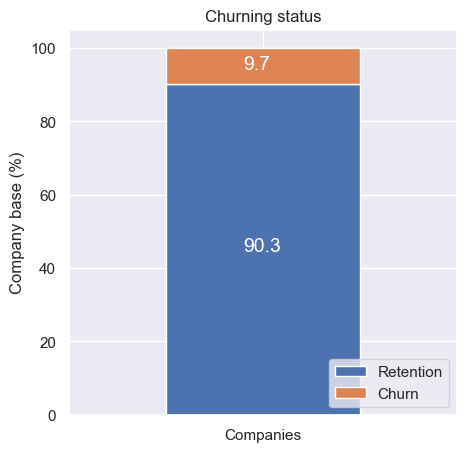

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

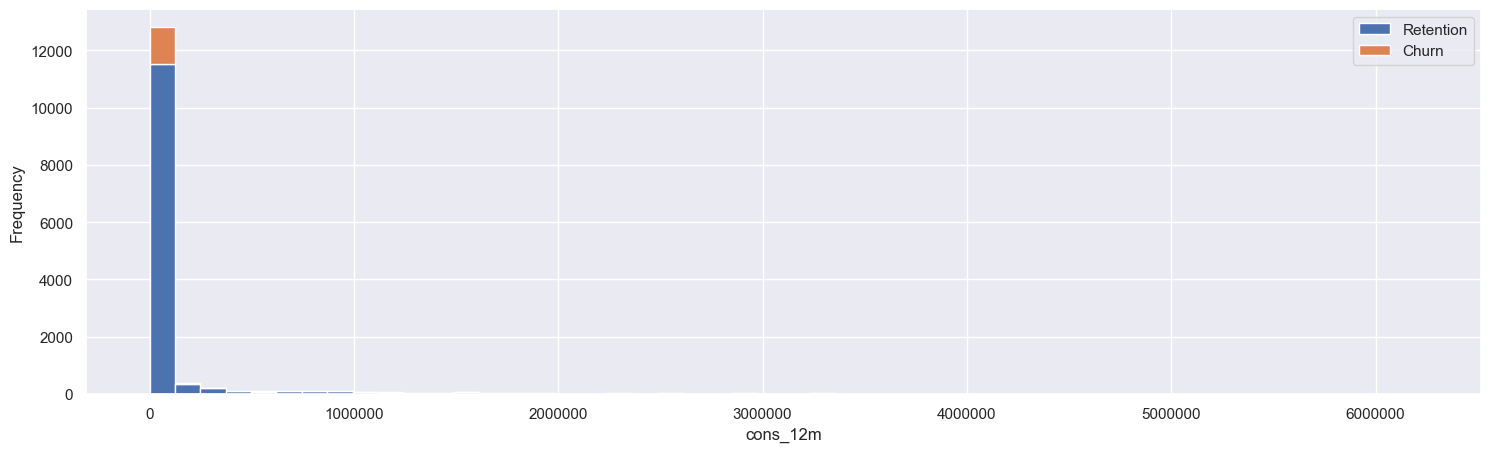

In [12]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [13]:
import numpy as np

# TO DO:

1. The data types of each column
2. Descriptive statistics of the dataset
3. Distributions of columns

# 1. categorical variables


#### The id feature wil mostly be used in to count the number of churned customer vs. retained customer & for counting other categorical features 
- id = client company identifier 

#### The 3 following features are dummy variables: hence it will be converted accordingly
- channel_sales = code of the sales channel (25% missing value - see distribution of missing value -> fill in accoarding to non missing value distribution)

- origin_up = code of the electricity campaign the customer first subscribed to ( 4% missing values - see distribution of missing value -> fill in accoarding to non missing value distribution))

- has_gas = indicated if client is also a gas client 

#### The nb_prod_act feature is technically a numerical feature however it is discrete, hence it will also be handled alongside the categorical values
- nb_prod_act = number of active products and services 


In [14]:
# client_df['channel_sales'].unique()
# client_df['origin_up'].unique()
# client_df['has_gas'].unique()


In [15]:
channels = pd.DataFrame({'id' : [0,1,2,3,4,5,6, 7], 'channel_id':[ np.nan, 'foosdfpfkusacimwkcsosbicdxkicaua',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa']})

campaign_first = pd.DataFrame({'id':[0,1,2,3,4,5], 'campaign_id':[np.nan, 'lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce']})
gas = pd.DataFrame({'id':[0,1], 'gas_id':['f', 't']})

In [16]:
client_df[['id','channel_sales', 'origin_up']]= client_df[['id',  'channel_sales','origin_up']].replace('MISSING',np.nan)
# the missing value are "MISSING", hence it is replaced with NaN to be able to impute them
categories = client_df[['id', 'channel_sales', 'origin_up', 'has_gas', 'nb_prod_act', 'churn']]
categories.describe(include='all')


,id,channel_sales,origin_up,has_gas,nb_prod_act,churn
count,14606,10881,14542,14606,14606.000000,14606.000000
unique,14606,7,5,2,NaN,NaN
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,lxidpiddsbxsbosboudacockeimpuepw,f,NaN,NaN
freq,1,6754,7097,11955,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.292346,0.097152
std,NaN,NaN,NaN,NaN,0.709774,0.296175
min,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,0.000000
75%,NaN,NaN,NaN,NaN,1.000000,0.000000


In [17]:
# Ensure consistency by mapping `channel_sales` to `channel_id`
channel_map = channels.set_index('channel_id')['id']
camp_map = campaign_first.set_index('campaign_id')['id']
gas_map = gas.set_index('gas_id')['id']

In [18]:
categories.loc[:, 'channel_sales'] = categories['channel_sales'].map(channel_map)
categories.loc[:, 'origin_up'] = categories['origin_up'].map(camp_map)
categories.loc[:, 'has_gas'] = categories['has_gas'].map(gas_map)

In [19]:
# categories[['channel_sales', 'origin_up', 'has_gas']].to_numeric()
categories.describe(include='all')
categories.head()

,id,channel_sales,origin_up,has_gas,nb_prod_act,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1,1,1,2,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,2,0,1,0
2,764c75f661154dac3a6c254cd082ea7d,1,2,0,1,0
3,bba03439a292a1e166f80264c16191cb,2,2,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,0,2,0,1,0


In [20]:
filtered_categories = categories[categories['channel_sales'] == 0]

filtered_categories = filtered_categories[filtered_categories['origin_up'] == 0]
filtered_categories['id'].to_list()

['9c4bde81b5b4913b46c28986b39be5ae',
 'f1d5af5e1fff4c8acaac81dce31028d0',
 '4b9699e29fdacb79af22fde808e1eb8d',
 '2e646d806424bb51b6dc214909cededf',
 '1874703dead66d87aec276a7e5bc196c',
 'd41b7cb4c82e1e18de315d7bf0128905',
 '4d3d93d9d32892297434bc16162b0a47',
 'f84bf253b1ac891627891fb9599275e8',
 '87e8041f2095e8fafdba1879467aa26e',
 '0dccd1453f6f633a673aac4a0b52d73c',
 '19ceefd89de8fa95680f2fdd87e34852',
 '829076714717ba944ae929a846259c0a',
 '08194f6221bfc93f6b174f4f3194db42',
 '4dbafe448d59092e174999b04b97b20f']

### handling nulls in 'channel_sales' and 'origin_up':
since there are only **14 rows out of total 14606 rows** will **null** values in both the *channel_sales* & the *origin* up value as well as they all ***are not churned customer***.
Dropping these null values is the most appropriate approach 

In [21]:
id_to_drop = ['9c4bde81b5b4913b46c28986b39be5ae',
 'f1d5af5e1fff4c8acaac81dce31028d0',
 '4b9699e29fdacb79af22fde808e1eb8d',
 '2e646d806424bb51b6dc214909cededf',
 '1874703dead66d87aec276a7e5bc196c',
 'd41b7cb4c82e1e18de315d7bf0128905',
 '4d3d93d9d32892297434bc16162b0a47',
 'f84bf253b1ac891627891fb9599275e8',
 '87e8041f2095e8fafdba1879467aa26e',
 '0dccd1453f6f633a673aac4a0b52d73c',
 '19ceefd89de8fa95680f2fdd87e34852',
 '829076714717ba944ae929a846259c0a',
 '08194f6221bfc93f6b174f4f3194db42',
 '4dbafe448d59092e174999b04b97b20f']
categories = categories[~categories['id'].isin(id_to_drop)]

In [22]:
non_zero_channel_sales = categories[categories['channel_sales'] != 0]
channel_sales_distribution = non_zero_channel_sales['channel_sales'].value_counts(normalize=True)

# Determine the number of entries with `channel_sales` as 0
num_zero_entries = (categories['channel_sales'] == 0).sum() # 3725

# Get the unique channel_sales categories (excluding 0)
unique_sales = channel_sales_distribution.index

# Generate random samples based on the distribution
random_samples = np.random.choice(unique_sales, size=num_zero_entries, p=channel_sales_distribution.values)

# Fill in the zero entries with the generated random samples
categories.loc[categories['channel_sales'] == 0, 'channel_sales'] = random_samples


In [23]:
non_null_origin_up = categories[categories['origin_up'] !=0]
originup_distribution = non_null_origin_up['origin_up'].value_counts(normalize=True)

num_null_origin = (categories['origin_up'] ==0).sum() # 50

unq_origin = originup_distribution.index
random_samples = np.random.choice(unq_origin, size=num_null_origin, p=originup_distribution.values)

categories.loc[categories['origin_up'] == 0, 'origin_up'] = random_samples

In [24]:
categories.describe(include='all')

,id,channel_sales,origin_up,has_gas,nb_prod_act,churn
count,14592,14592.0,14592.0,14592.0,14592.000000,14592.000000
unique,14592,7.0,5.0,2.0,NaN,NaN
top,24011ae4ebbe3035111d65fa7c15bc57,1.0,1.0,0.0,NaN,NaN
freq,1,9033.0,7123.0,11943.0,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.292421,0.097245
std,NaN,NaN,NaN,NaN,0.709900,0.296301
min,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,0.000000
75%,NaN,NaN,NaN,NaN,1.000000,0.000000


#### since 'id' is a unique identifier, we would need to check for duplicates in this column


In [25]:
# Checking for duplicates in the 'id' column
duplicate_ids = categories['id'][categories['id'].duplicated()]

if not duplicate_ids.empty:
    print("Duplicate IDs found:")
    print(duplicate_ids)
else:
    print("No duplicate IDs found.")

No duplicate IDs found.


#### for 'channel_sales',	'origin_up',	'has_gas' , 'nb_prod_act' we would need to check for distribution of value in these columns

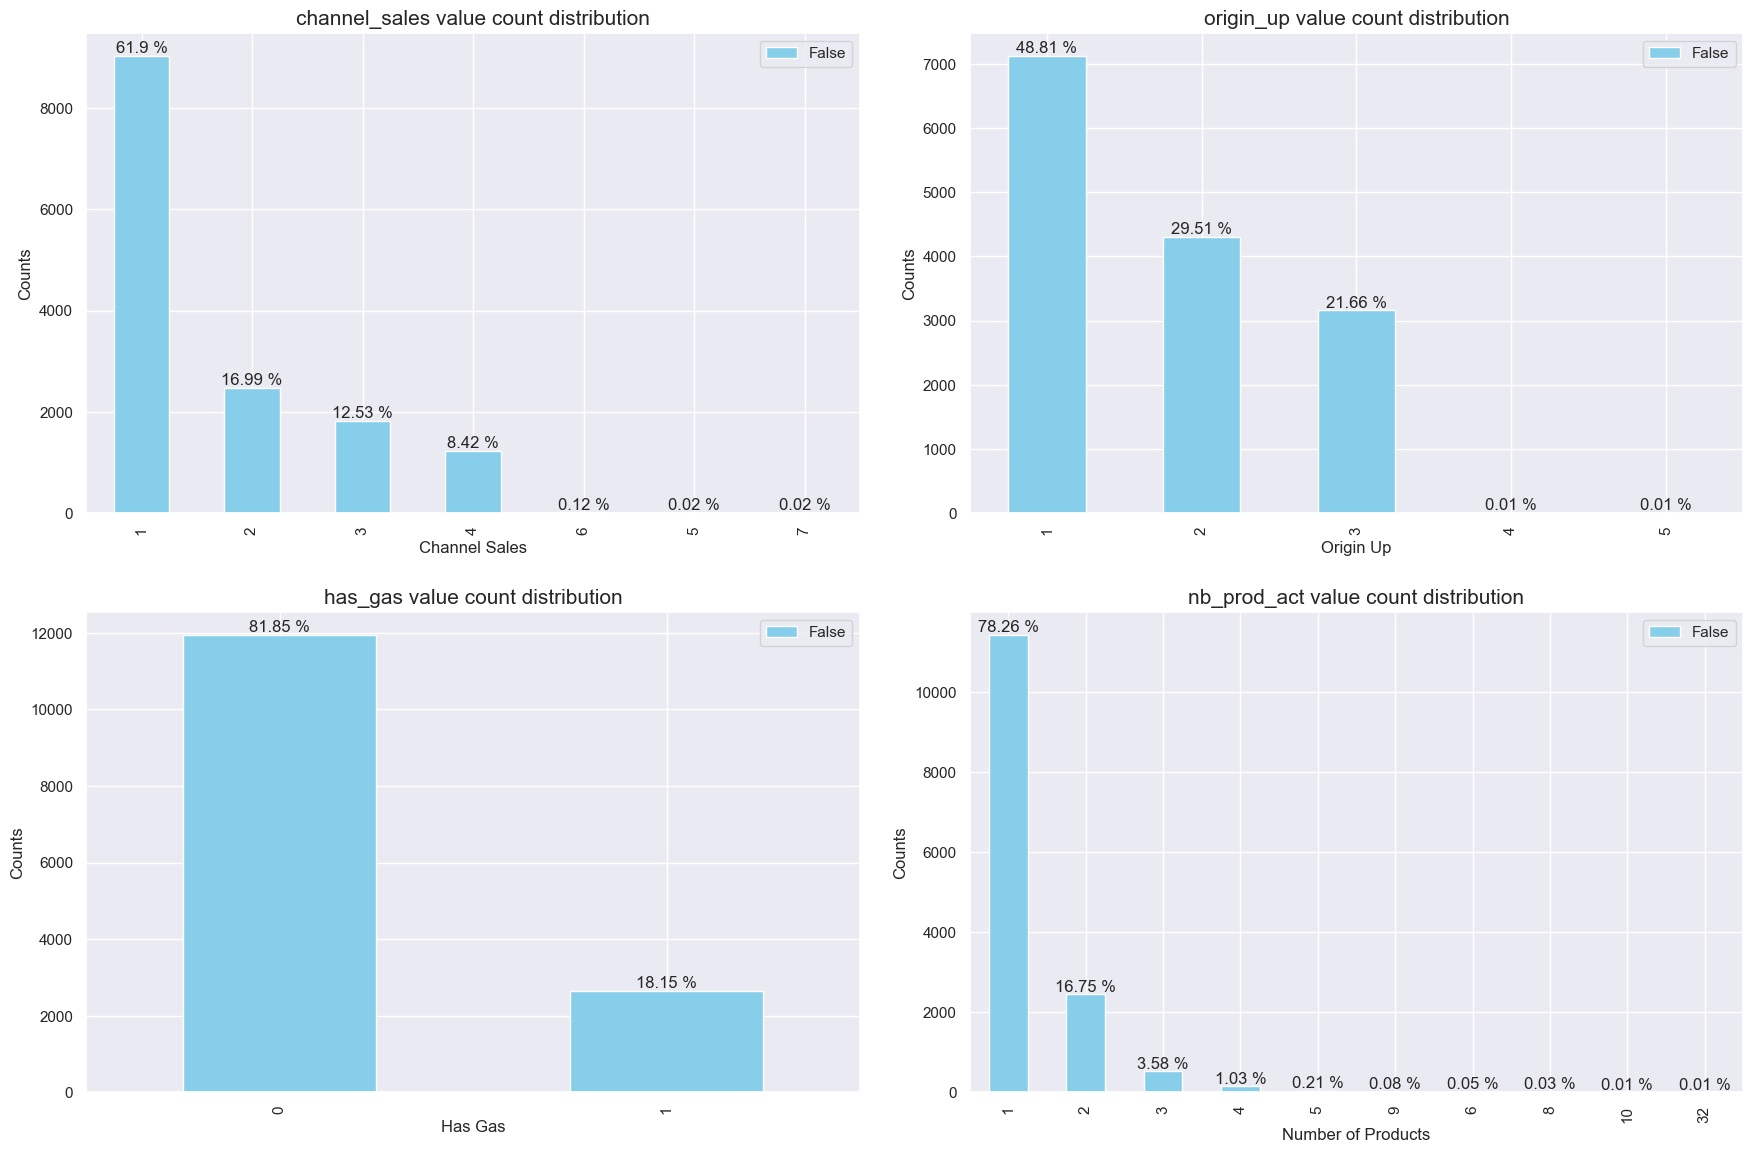

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols = 2 ,  figsize=(18, 12))
cols = ['channel_sales',	'origin_up',	'has_gas' , 'nb_prod_act']
titles = ['Channel Sales', 'Origin Up', 'Has Gas', 'Number of Products']

for i, col_name in enumerate(cols):
    row = i // 2
    col = i % 2
    cat_columns = categories[[col_name]].value_counts().reset_index(name='count')
    
    bars = cat_columns.plot(kind='bar',x=col_name, y='count', ax=ax[row, col], color='skyblue', label=False)
    ax[row, col].set_title(f'{col_name} value count distribution', fontsize = 15)

        # Annotate each churn1 bar with the percentage
    cat_columns['proportion'] = cat_columns['count']/len(categories)
    for idx, bar in enumerate(bars.patches):
        # Get the count value
        proportion = cat_columns[['proportion']].iloc[ idx, 0]
        proportion=f'{(proportion*100).round(2)} %'
        # Get the bar's x and y coordinates
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        # Annotate the bar with the count
        ax[row, col].text(x, y, f'{proportion}', ha='center', va='bottom')

    ax[row, col].set_xlabel(titles[i])
    ax[row, col].set_ylabel('Counts')
    ax[row,col].legend()

plt.tight_layout(pad=2.0) 

### 1.1 getting deeper insights in each categorical values and its distribution in relation to the churn value

In [27]:
churn_based_on_channel = pd.pivot_table(
    categories, 
    values='id', 
    index='churn', 
    columns=['channel_sales'], 
    aggfunc='count', 
    sort=True
)
churn_based_on_channel.reset_index(inplace=True)
churn_based_on_channel.drop(columns=['churn'], inplace=True)

In [28]:
churn_based_on_first_camp = pd.pivot_table(
    categories, 
    values='id', 
    index='churn', 
    columns=['origin_up'], 
    aggfunc='count', 
    sort=True
)
churn_based_on_first_camp.reset_index(inplace=True)
churn_based_on_first_camp.drop(columns=['churn'], inplace=True)

In [29]:
churn_based_on_hasgas = pd.pivot_table(
    categories, 
    values='id', 
    index='churn', 
    columns=['has_gas'], 
    aggfunc='count', 
    sort=True
)

churn_based_on_hasgas.reset_index(inplace=True)
churn_based_on_hasgas.drop(columns=['churn'], inplace=True)

In [30]:
churn_based_on_noprod = pd.pivot_table(
    categories, 
    values='id', 
    index='churn', 
    columns=['nb_prod_act'], 
    aggfunc='count', 
    sort=True
)

churn_based_on_noprod.reset_index(inplace=True)
churn_based_on_noprod.drop(columns=['churn'], inplace=True)

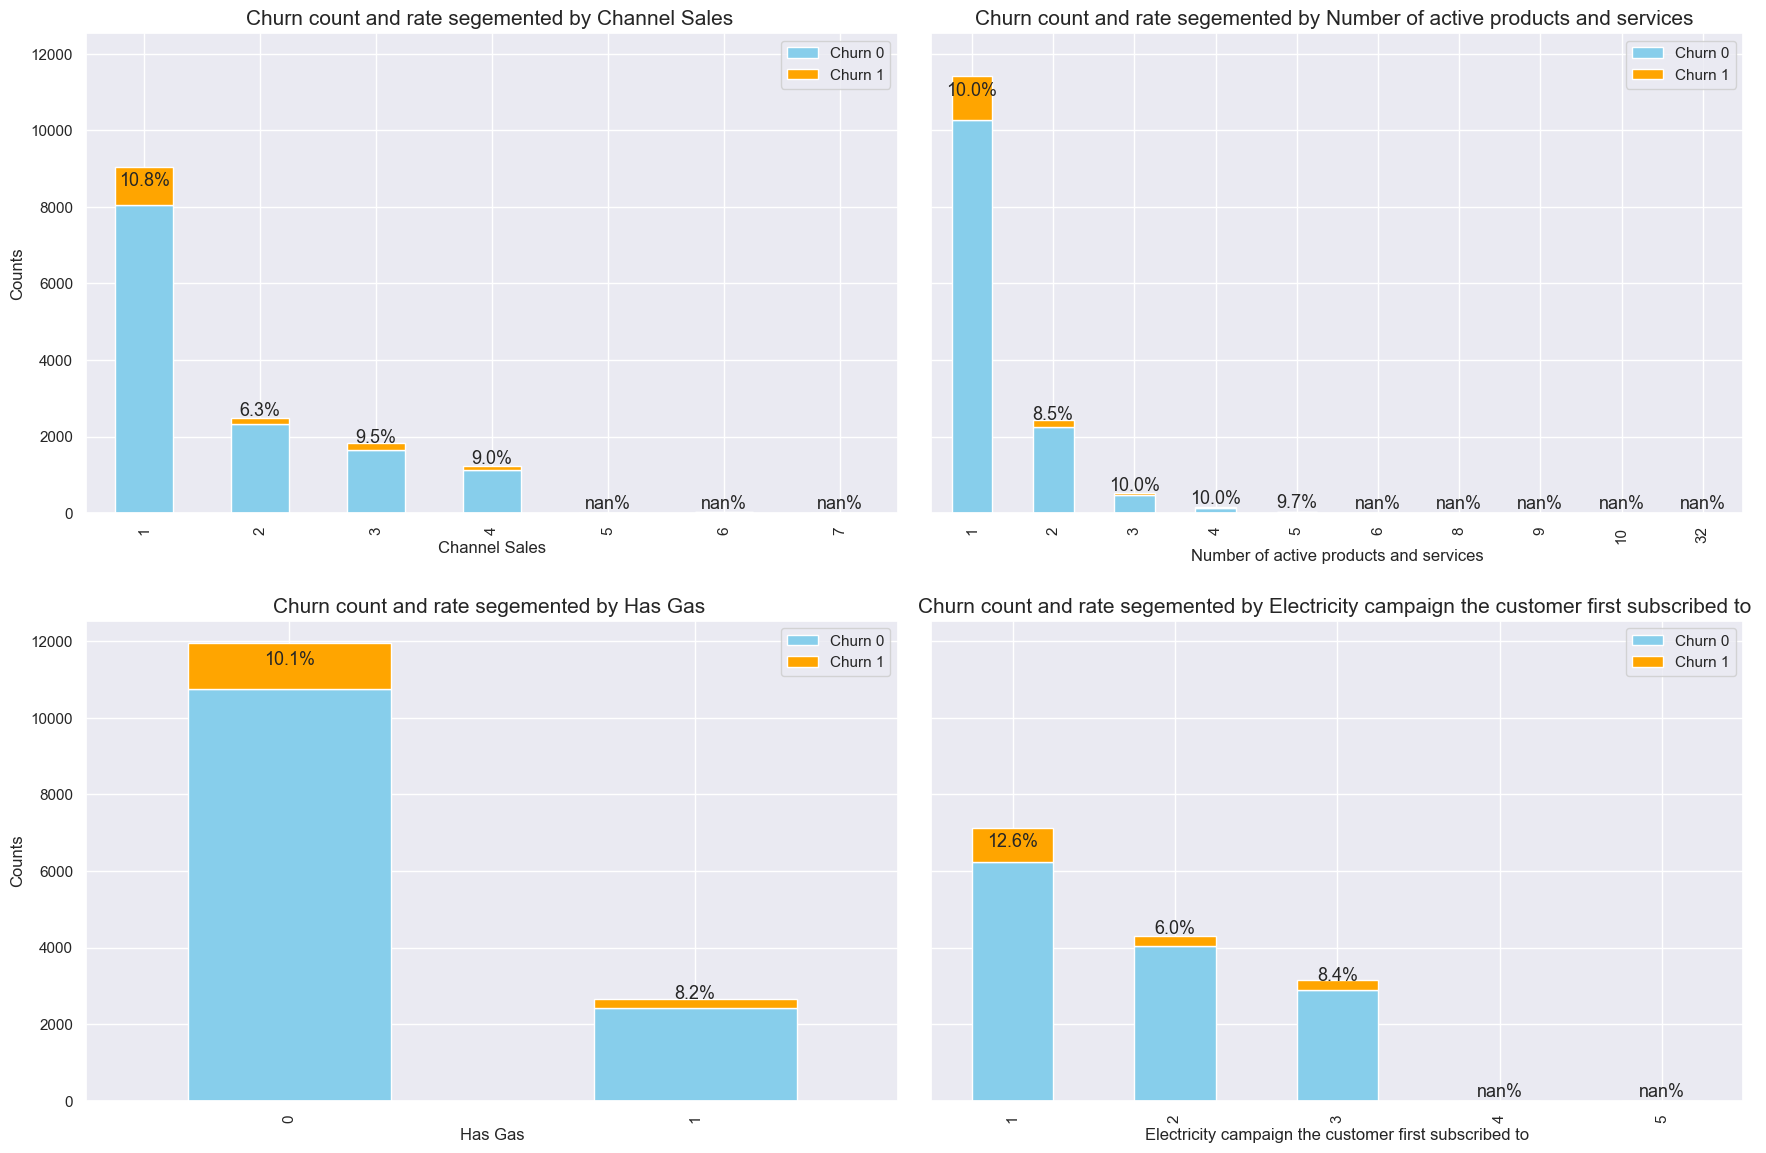

In [31]:
df_list = [churn_based_on_channel, churn_based_on_noprod, churn_based_on_hasgas, churn_based_on_first_camp]
titles = ['Channel Sales', 'Number of active products and services', 'Has Gas', 'Electricity campaign the customer first subscribed to']

# Create a 2x2 grid of subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), sharey=True)

for i, df in enumerate(df_list):
    row = i // 2
    col = i % 2
    
    churn0 = df.loc[0]
    churn1 = df.loc[1]
    # Plot churn 0 and churn 1 on the same bar plot
    churn0_bars = churn0.plot(kind='bar', stacked=True, ax=ax[row, col], color='skyblue', label='Churn 0')
    churn1_bars = churn1.plot(kind='bar', stacked=True, ax=ax[row, col], color='orange', label='Churn 1', bottom=churn0)

        # Annotate each churn1 bar with the percentage
    for idx, bar in enumerate(churn1):
        height1 = churn1_bars.patches[idx].get_height()
        x = churn1_bars.patches[idx].get_x() + churn1_bars.patches[idx].get_width() / 2
        
        # Find the corresponding churn0 churn1_bars.patches[idx]
        height0 = churn0_bars.patches[idx].get_height() if idx < len(churn0_bars.patches) else 0
        
        total_height = height0 + height1
        if total_height > 0:
            percentage = np.array(churn1)[idx] / (np.array(churn0)[idx]+np.array(churn1)[idx])
            ax[row, col].text(x,  height1 + 0.05 * height1, f'{percentage:.1%}', ha='center', va='bottom', fontsize=13)
       
    ax[row, col].set_title(f'Churn count and rate segemented by {titles[i]} ', fontsize =15)
    ax[row, col].set_xlabel(titles[i])
    ax[row, col].set_ylabel('Counts')
    ax[row,col].legend()

plt.tight_layout(pad=2.0) 
plt.show()

based on the charts, we can see a clear distinction of churn rate based on the **first campaing the customer** (origin_up) was subscribe to: with **12%** of customer first subcribing to the 1 ('lxidpiddsbxsbosboudacockeimpuepw') campaign being churned, compared to the 6% and 8.4% of the 2 & 3 ( 'kamkkxfxxuwbdslkwifmmcsiusiuosws', 'ldkssxwpmemidmecebumciepifcamkci') campaign

as for the 3 other feature:
- channels_sales: we can see a large portion of clients are from the '1' channels sales, how ever this is also the channels sales wit the highest churnrate (at 10%, by a 0.6% margin compared to the 2nd highest churnrate by channels_sales )
- number of active products and services:  a large portion of clients have 1 active product/service, this number has wit the highest churnrate (at 10%, by a 1.5% margin compared to the 2nd highest churnrate by number of active products/service)
- has gas or not: majority of clients do not have gas, this portion has the higher churnrate (at 10.1%, by a 1.9% margin compared to those who do not have gas)




# date time variables
since the dataset provided has timestamp for the 4 columns: 'date_activ','date_end','date_modif_prod','date_renewal'

it is best to convert these into year data indicating year_activ, year_end, year_modif, year_renewal


In [32]:
client_df[['id','channel_sales','origin_up']].astype('str').inplace=True
client_df[['date_activ','date_end','date_modif_prod','date_renewal']]=client_df[['date_activ','date_end','date_modif_prod','date_renewal']].apply(pd.to_datetime)


In [33]:
client_df[['date_activ','date_end','date_modif_prod','date_renewal']].dtypes

date_activ         datetime64[ns]
date_end           datetime64[ns]
date_modif_prod    datetime64[ns]
date_renewal       datetime64[ns]
dtype: object

In [34]:
timeframe = client_df[['id','date_activ','date_end','date_modif_prod','date_renewal', 'num_years_antig', 'churn']]
timeframe.describe()


,date_activ,date_end,date_modif_prod,date_renewal,num_years_antig,churn
count,14606,14606,14606,14606,14606.000000,14606.000000
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,4.997809,0.097152
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,1.000000,0.000000
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,4.000000,0.000000
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,5.000000,0.000000
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,6.000000,0.000000
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,13.000000,1.000000
std,NaN,NaN,NaN,NaN,1.611749,0.296175


In [35]:
def scatterplot(df, x, y , xlabel, ylabel, title):
    ax = df.plot(kind='area', stack=True ,x =x, y = y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

#### for the timestamp values in of 'date_activ',	'date_end',	'date_modif_prod',	'date_renewal'
simplify the value to only the year of the time stamp 

plot distribution of year of activ, end, modif, renewal 

In [36]:
year_columns = ['year_activ',	'year_end',	'year_modif_prod',	'year_renewal']
date_columns = ['date_activ','date_end','date_modif_prod','date_renewal']

# Extract year from each date column
for idx, col in enumerate(date_columns):
    timeframe.loc[:,[year_columns[idx]]] = timeframe[date_columns[idx]].dt.year
timeframe.head()


,id,date_activ,date_end,date_modif_prod,date_renewal,num_years_antig,churn,year_activ,year_end,year_modif_prod,year_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,2013-06-15,2016-06-15,2015-11-01,2015-06-23,3,1,2013,2016,2015,2015
1,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,6,0,2009,2016,2009,2015
2,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,6,0,2010,2016,2010,2015
3,bba03439a292a1e166f80264c16191cb,2010-03-30,2016-03-30,2010-03-30,2015-03-31,6,0,2010,2016,2010,2015
4,149d57cf92fc41cf94415803a877cb4b,2010-01-13,2016-03-07,2010-01-13,2015-03-09,6,0,2010,2016,2010,2015


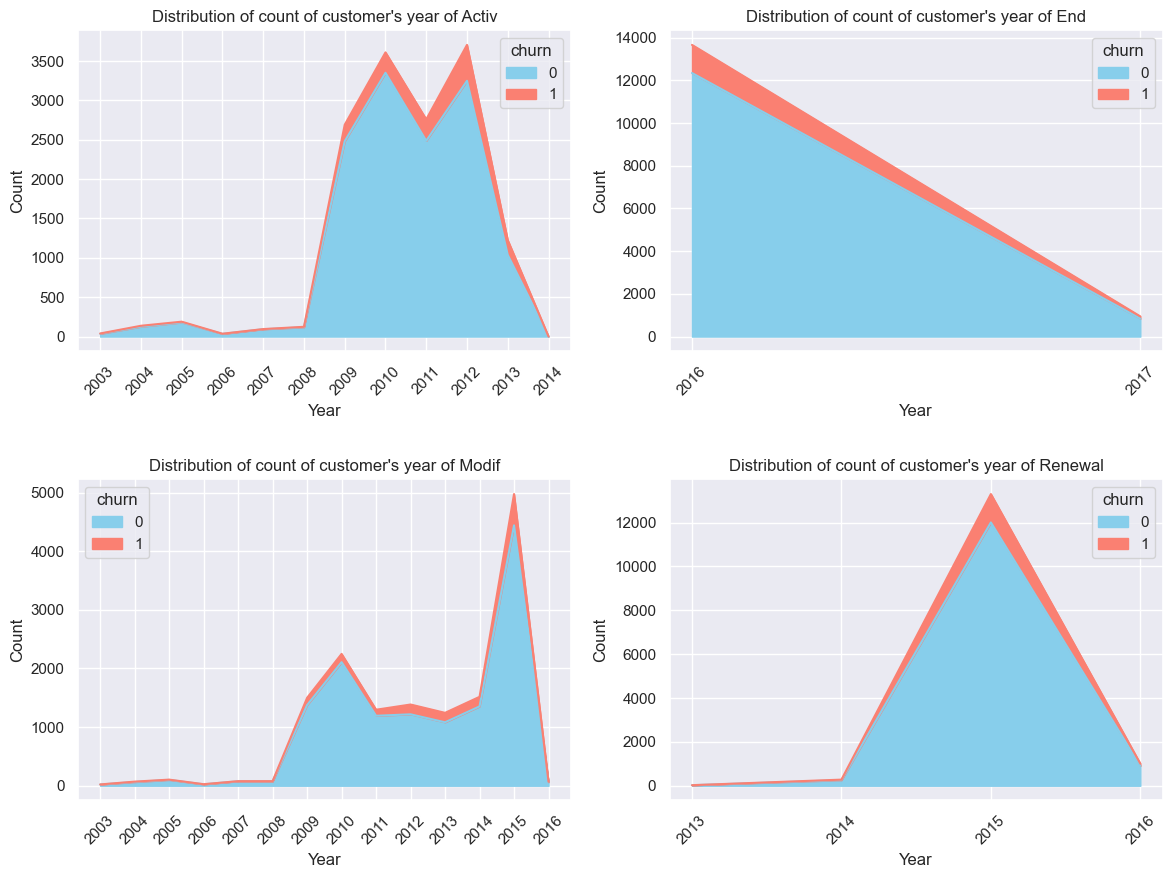

In [37]:

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.4)

ax = ax.flatten()

for i, col in enumerate(date_columns):
    year_column = year_columns[i]
    year = timeframe[['id','churn', year_column]]
    year = pd.pivot_table(
    year, 
    values='id', 
    index='churn', 
    columns=[year_column], 
    aggfunc='count', 
    sort=True
    ).transpose()
    year.plot(kind='area', stacked=True, ax=ax[i], color=['skyblue', 'salmon'])
    ax[i].set_title(f'Distribution of count of customer\'s year of {date_columns[i].split("_")[1].capitalize()}')
    ax[i].set_xlabel('Year')
    ax[i].set_ylabel('Count')
    ax[i].set_xticks(year.index)
    ax[i].set_xticklabels(year.index, rotation=45)



In [38]:
antig_churn = timeframe.groupby(['num_years_antig', 'churn']).size().unstack()

antig_churn.rename(columns={0: 'Retention', 1: 'Churned'}, inplace=True)
antig_churn.loc[:,['retention_rate']] = antig_churn['Retention'] / (antig_churn['Retention'] + antig_churn['Churned']) * 100
antig_churn.loc[:,['churn_rate']] = antig_churn['Churned'] / (antig_churn['Retention'] + antig_churn['Churned']) * 100
antig_churn.reset_index(inplace=True)
antig_churn.columns = antig_churn.columns.to_flat_index()  # Flatten any multi-level columns
antig_churn.columns = [f'{col[0]}_{col[1]}' if isinstance(col, tuple) else col for col in antig_churn.columns]

antig_churn.set_index('num_years_antig', inplace=True)
antig_churn.head()

,Retention,Churned,retention_rate,churn_rate
num_years_antig,,,,
1,1.0,NaN,NaN,NaN
2,8.0,3.0,72.727273,27.272727
3,2104.0,329.0,86.477600,13.522400
4,3510.0,472.0,88.146660,11.853340
5,2117.0,200.0,91.368148,8.631852


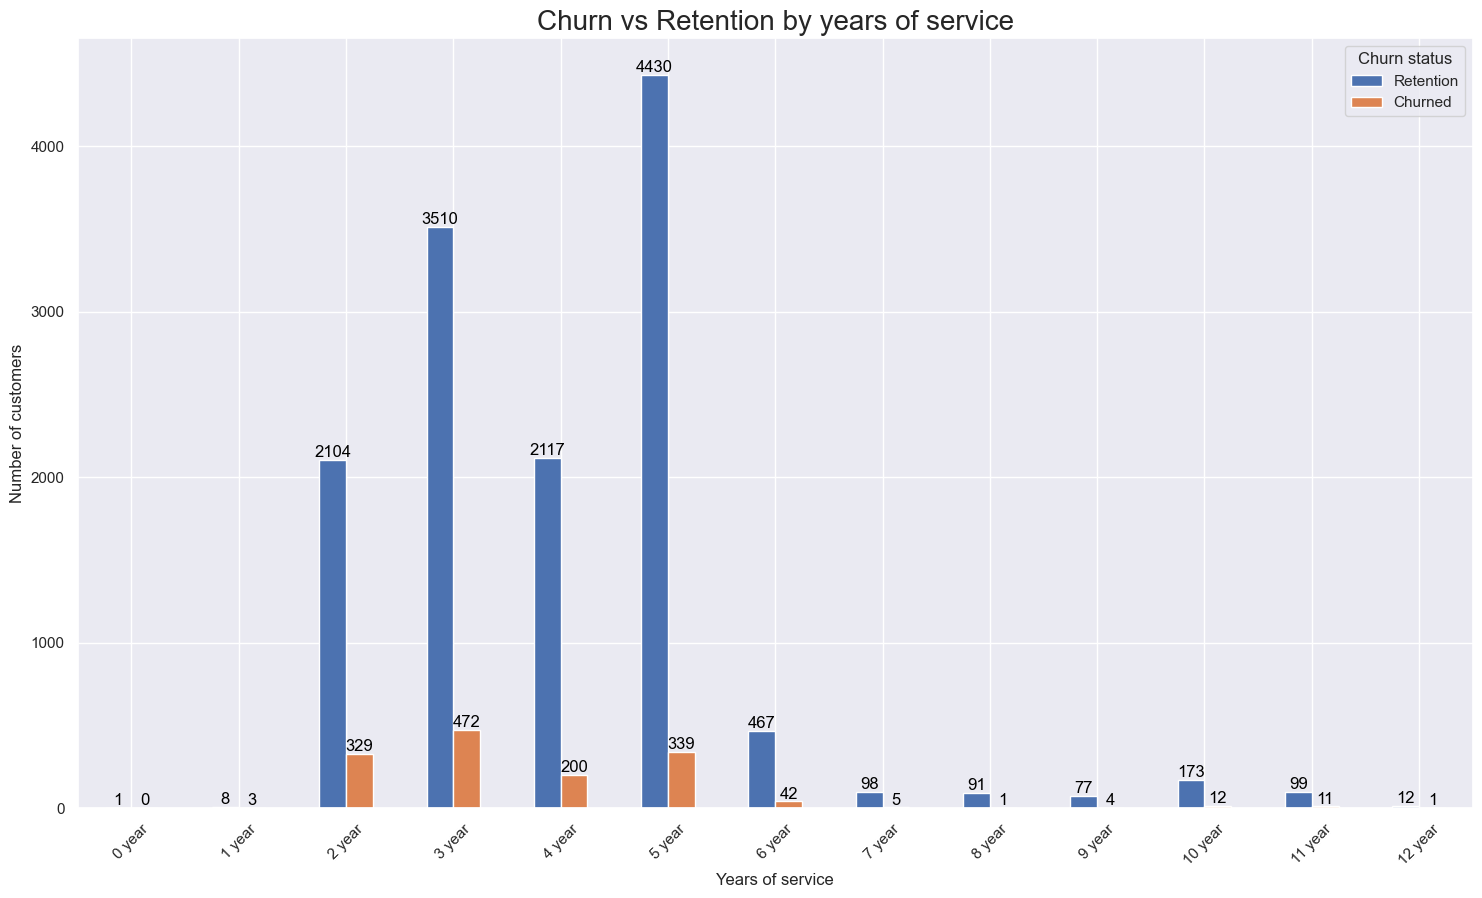

In [39]:
fig, ax = plt.subplots(nrows= 1 , ncols = 1, figsize=(18, 10))
antig_churn[['Retention', 'Churned']].plot(kind='bar', stacked=False, ax=ax)

def annotate_stacked_bars(ax, textsize=15, color='black', pad=1):
    for idx, bar in enumerate(ax.patches):
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height() 

        ax.text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=textsize, color=color)
        

annotate_stacked_bars(ax, textsize=12, color='black', pad=1)
ax.set_title('Churn vs Retention by years of service', fontsize =20)

xticks = ax.get_xticks()  # Get current x-tick positions
ax.set_xticklabels([f'{int(x)} year' for x in xticks], rotation=45)

ax.set_ylabel('Number of customers')
ax.set_xlabel('Years of service')
ax.legend(title='Churn status', loc='upper right')
plt.show()



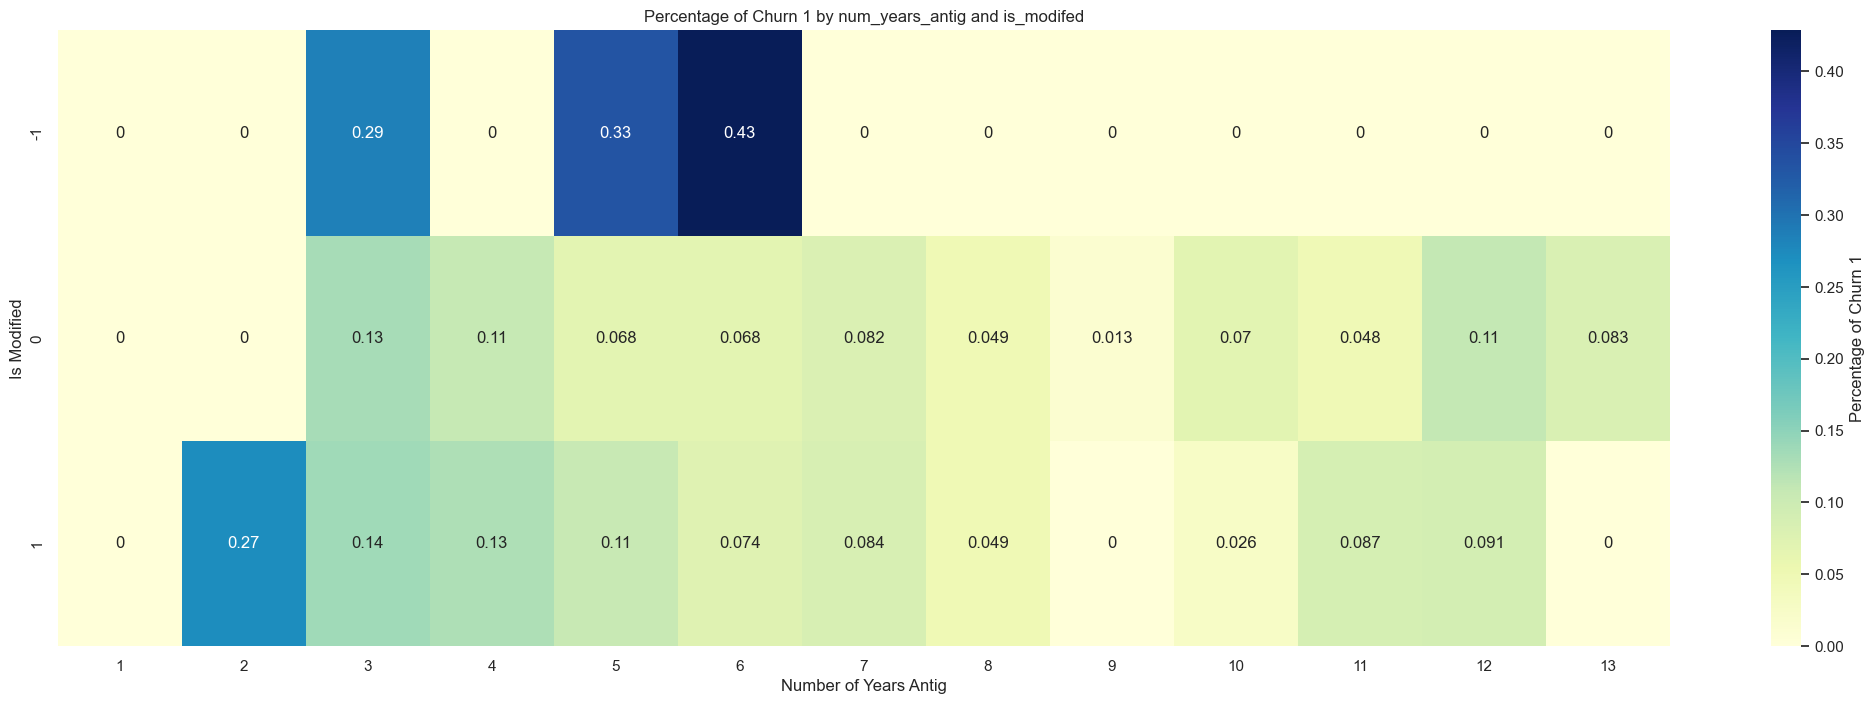

In [40]:
timeframe.loc[:,['is_modifed']] = (timeframe['date_modif_prod'] - timeframe['date_activ']).dt.days
modified_churn = timeframe.loc[:,['is_modifed', 'num_years_antig' ,'churn']]

# Modify 'is_modifed' column
modified_churn.loc[modified_churn['is_modifed'] > 0, 'is_modifed'] = 1
modified_churn.loc[modified_churn['is_modifed'] < 0, 'is_modifed'] = -1
modified_churn.describe()
pivot_table = pd.pivot_table(
    modified_churn,
    values='churn',
    index='is_modifed',
    columns='num_years_antig',
    aggfunc='sum',
    fill_value=0
)

# Calculate the total counts for each (is_modifed, num_years_antig) combination
total_counts = pd.pivot_table(
    modified_churn,
    values='churn',
    index='is_modifed',
    columns='num_years_antig',
    aggfunc='size',
    fill_value=0
)

# Calculate the percentage of churn 1
percentage_churn_1 = (pivot_table / total_counts).fillna(0)

# Plot the heatmap
plt.figure(figsize=(26, 8))
sns.heatmap(percentage_churn_1, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Percentage of Churn 1'})
plt.title('Percentage of Churn 1 by num_years_antig and is_modifed')
plt.xlabel('Number of Years Antig')
plt.ylabel('Is Modified')
plt.show()

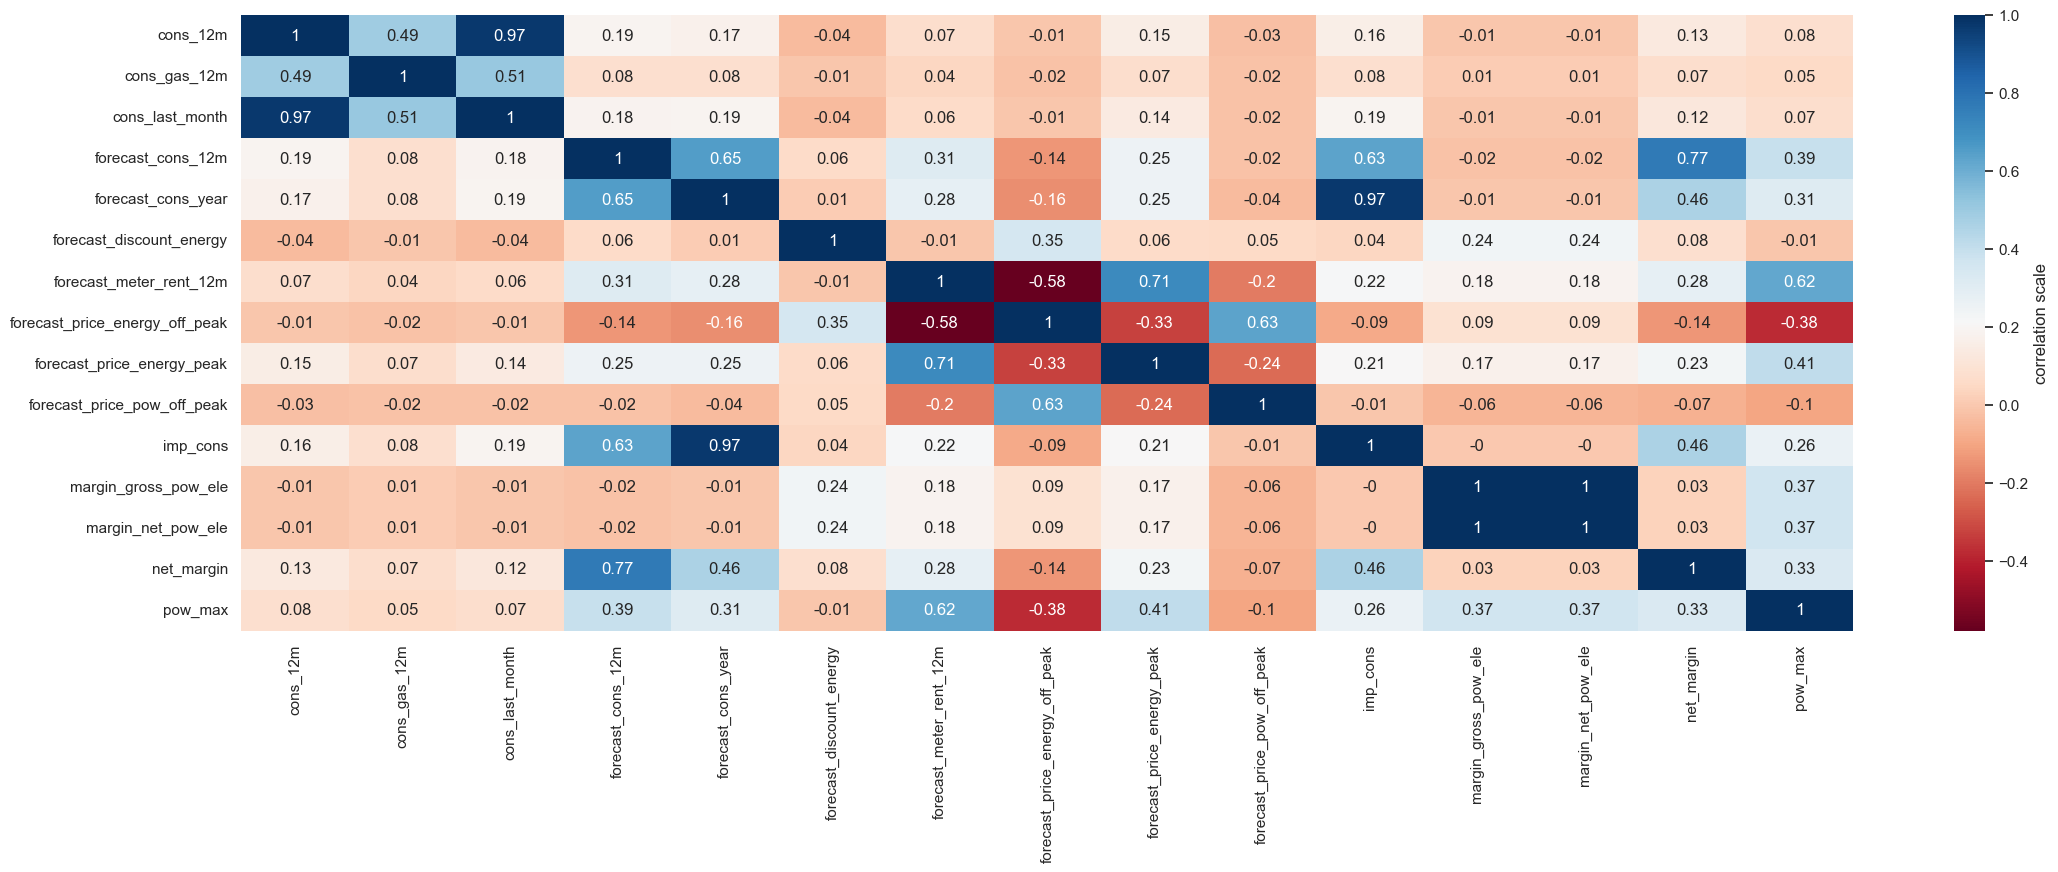

In [41]:
consp = client_df[['cons_12m','cons_gas_12m','cons_last_month', 'forecast_cons_12m','forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak','imp_cons','margin_gross_pow_ele','margin_net_pow_ele','net_margin','pow_max']]
consp_corr = consp.corr().round(2)

plt.figure(figsize=(26, 8))

sns.heatmap(consp_corr, annot=True, cmap='RdBu', cbar_kws={'label': 'correlation scale'})
plt.show()


#### drop the margin_gross_pow_ele (1 corr index with margin_net_pow_ele)


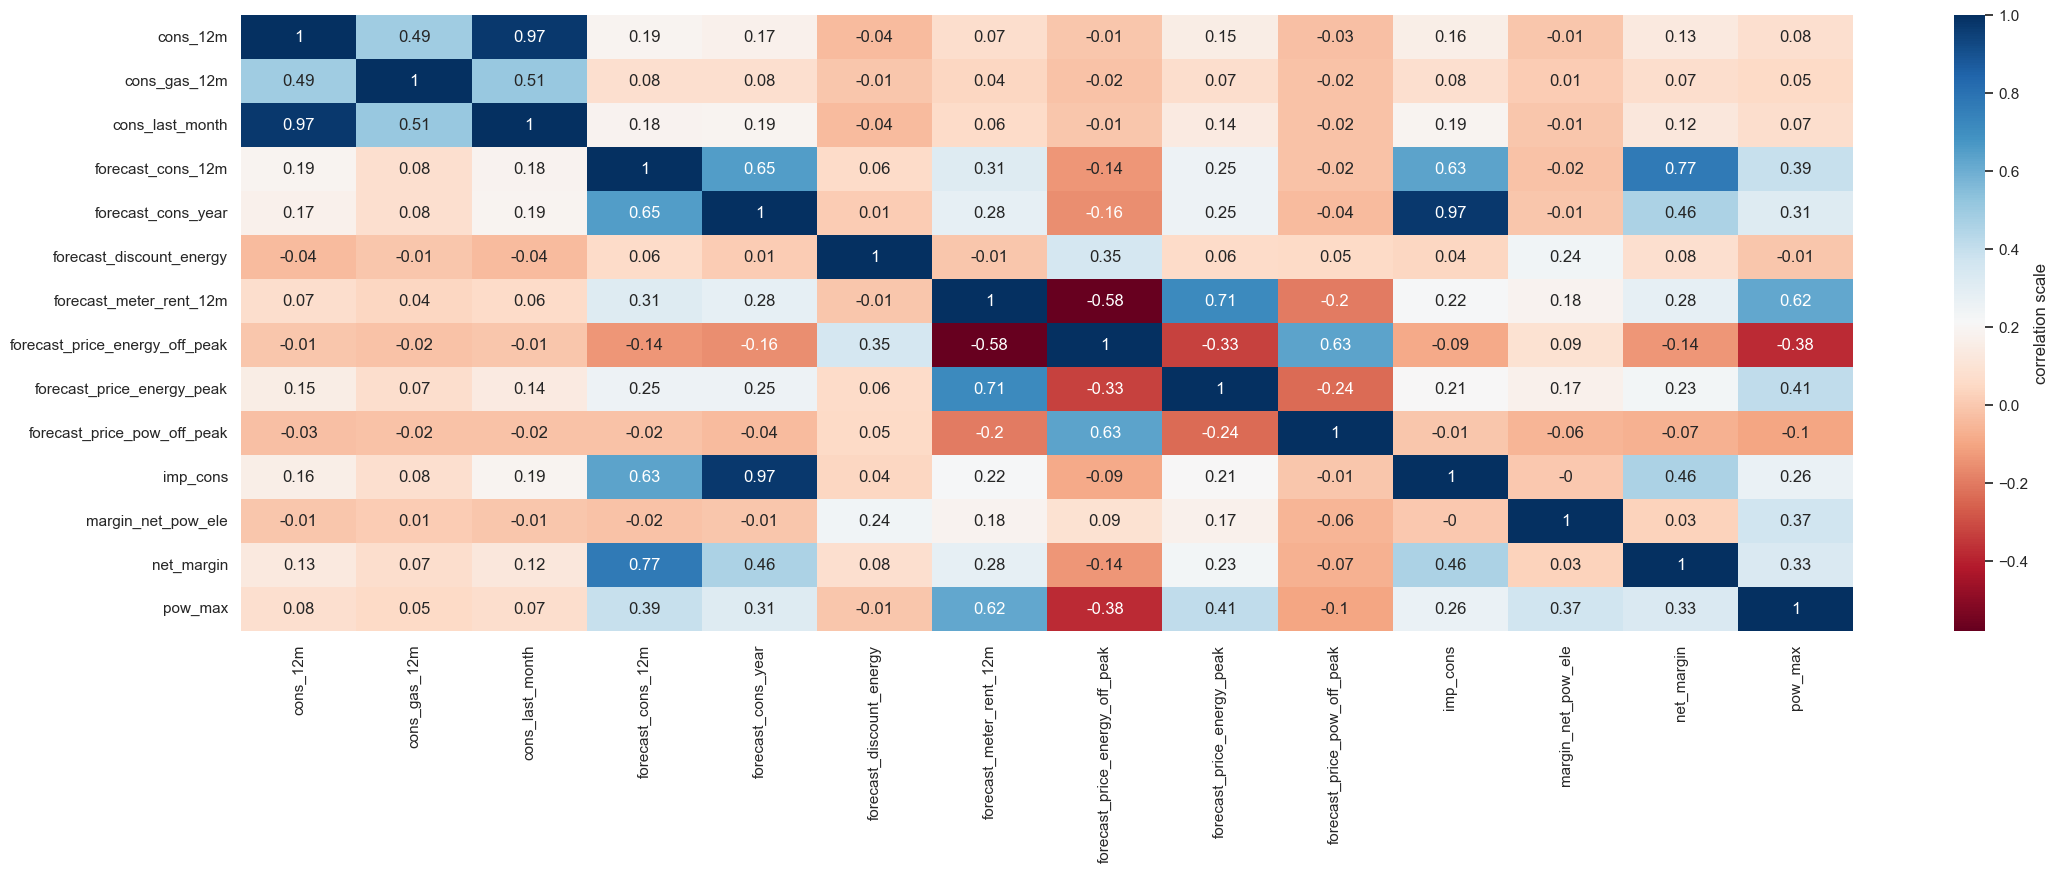

In [42]:
consp = consp.drop(columns='margin_gross_pow_ele')
consp_corr = consp.corr().round(2)

plt.figure(figsize=(26, 8))

sns.heatmap(consp_corr, annot=True, cmap='RdBu', cbar_kws={'label': 'correlation scale'})
plt.show()



# client_data.csv 

- categorical:

id = client company identifier 

channel_sales = code of the sales channel (25% missing value - see distribution of missing value -> fill in accoarding to non missing value distribution)

origin_up = code of the electricity campaign the customer first subscribed to ( 4% missing values - see distribution of missing value -> fill in accoarding to non missing value distribution))

has_gas = indicated if client is also a gas client 

nb_prod_act = number of active products and services 

~~activity_new = category of the company’s activity~~ does not include this columnm

- timeseries data: 

date_activ = date of activation of the contract 

date_end = registered date of the end of the contract 

date_modif_prod = date of the last modification of the product 

date_renewal = date of the next contract renewal 

num_years_antig = antiquity of the client (in number of years) 

- numerical pricing data: 
- - *historical e consumption*

cons_12m = electricity consumption of the past 12 months 

cons_last_month = electricity consumption of the last month 

- - *forcasted e consumption*

forecast_cons_12m = forecasted electricity consumption for next 12 months 

forecast_cons_year = forecasted electricity consumption for the next calendar year

- - *forcasted price of energy*  

forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak) 

forecast_price_energy_peak = forecasted energy price for 2nd period (peak) 

forecast_price_pow_off_peak = forecasted power price for 1st period (off peak) 

forecast_meter_rent_12m = forecasted bill of meter rental for the next 12 months 

- - *historical gas consumption*

cons_gas_12m = gas consumption of the past 12 months 

imp_cons = current paid consumption (check against churn (good idicator churned clients))

forecast_discount_energy = forecasted value of current discount 

margin_gross_pow_ele = gross margin on power subscription ***vs*** margin_net_pow_ele = net margin on power subscription (check difference)

net_margin = total net margin 

pow_max = subscribed power 


- dependent variable: 

churn = has the client churned over the next 3 months 


# price_data.csv 
 
id = client company identifier 

price_date = reference date 

price_off_peak_var = price of energy for the 1st period (off peak) 

price_peak_var = price of energy for the 2nd period (peak) 

price_mid_peak_var = price of energy for the 3rd period (mid peak) 

price_off_peak_fix = price of power for the 1st period (off peak) 

price_peak_fix = price of power for the 2nd period (peak) 

price_mid_peak_fix = price of power for the 3rd period (mid peak) 

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power 

In [43]:
price_df.shape # (193002, 8)

(193002, 8)

In [44]:
price_df[['price_date']]= price_df[['price_date']].apply(pd.to_datetime)
price_df.dtypes


id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

In [45]:
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

In [46]:
price_df.describe()


,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2015-06-16 12:50:49.933161216,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2015-07-01 00:00:00,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592


In [47]:
price_rate_df = price_df[['price_off_peak_var',  'price_peak_var', 'price_mid_peak_var']]
# Melt the DataFrame to long format for easy plotting with seaborn
price_rate_melted = price_rate_df.melt(var_name='rate_type', value_name='rate')


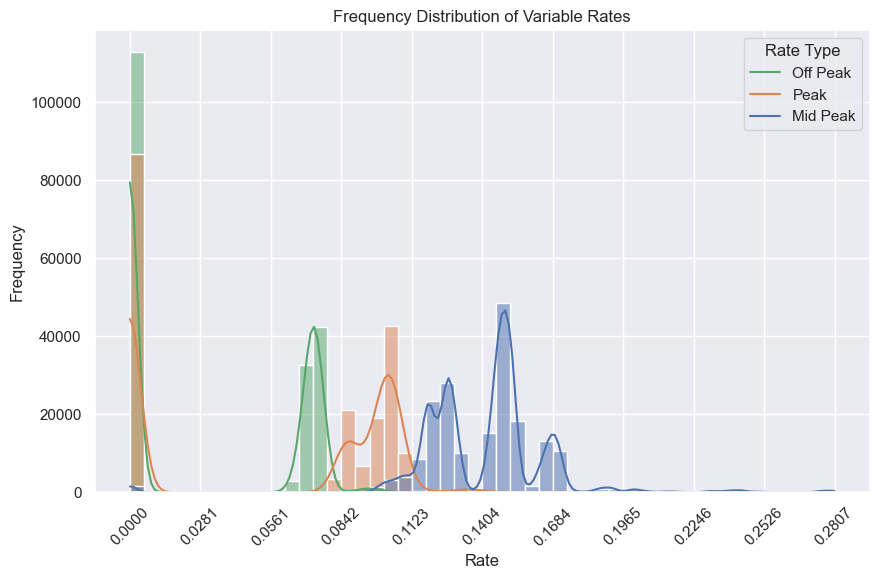

In [48]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
num_bins = 50
bin_edges = np.linspace(price_rate_melted['rate'].min(), price_rate_melted['rate'].max(), num_bins + 1)

sns.histplot(data=price_rate_melted, x='rate', hue='rate_type', kde=True, bins=bin_edges)

plt.title('Frequency Distribution of Variable Rates')
plt.xlabel('Rate')
plt.xticks(bin_edges[::num_bins//10], rotation=45)
plt.ylabel('Frequency')
plt.legend(title='Rate Type', labels=['Off Peak', 'Peak', 'Mid Peak'])
plt.show()


In [49]:
fix_price_df = price_df[['price_off_peak_fix', 'price_peak_fix','price_mid_peak_fix']]
fix_price_df.nunique()

price_off_peak_fix    66
price_peak_fix        31
price_mid_peak_fix    28
dtype: int64

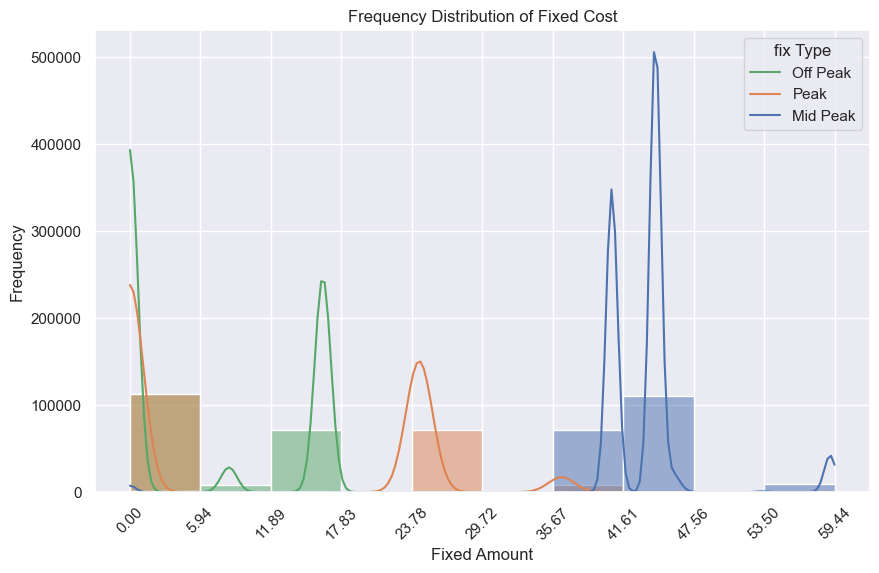

In [50]:
fix_price_melted = fix_price_df.melt(var_name='fix_type', value_name='fix')

plt.figure(figsize=(10, 6))
num_bins = 10
bin_edges = np.linspace(fix_price_melted['fix'].min(), fix_price_melted['fix'].max(), num_bins + 1)

sns.histplot(data=fix_price_melted, x='fix', hue='fix_type', kde=True, bins=bin_edges)

plt.title('Frequency Distribution of Fixed Cost')
plt.xlabel('Fixed Amount')
plt.xticks(bin_edges[::num_bins//10], rotation=45)
plt.ylabel('Frequency')
plt.legend(title='fix Type', labels=['Off Peak', 'Peak', 'Mid Peak'])
plt.show()

###  price_df has 3 different type (off-peak-mid) of 2 kind of price: variable rate / fix cost rate for 16906 clients and the price_date reference for when the variable rate and the fix cost rate are changed (if changed):
##### hence we can remove some of the rows with the same combination of prices for different move(because we know each client will have price info for 12 months in 2015 ) and resulting in a df with the id of the unique price rates combinations long with date ref for when they were changed

In [51]:
unique_columns = ['id','price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']

# Drop duplicates based on the specified columns
unique_price_df = price_df.drop_duplicates(subset=unique_columns)
unique_price_df.loc[:,['month_price']] = unique_price_df['price_date'].dt.month
# Display the resulting DataFrame
unique_price_df.shape

(61749, 9)

In [60]:
count_price_change = unique_price_df.groupby('id').count().reset_index()
no_of_time_price_changes = count_price_change[['id','month_price']]

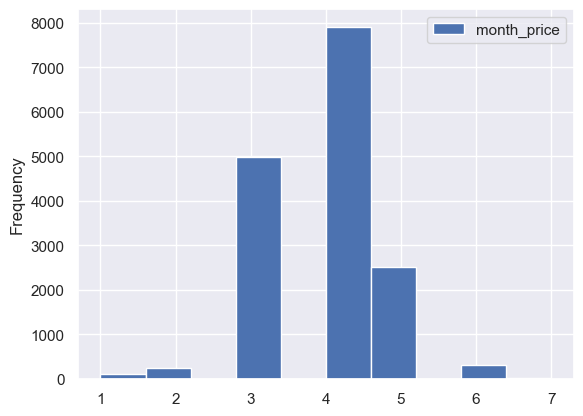

In [61]:
ax = no_of_time_price_changes.plot(kind='hist')



### most customer has 3-5 times that their prices changed in 2015, the number of customer with 4 times of price changed in 2015was highest at nearly 8000 customers 

In [54]:
unique_price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month_price
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,1
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,4
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0,6
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0,7
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0,8


- unique_price_df Clients: There are 61.749 unique combinations of price_date, price_off_peak_var, price_peak_var, price_mid_peak_var, price_off_peak_fix, price_peak_fix, and price_mid_peak_fix.
- price_df Clients: There are 16096 clients in the dataset.

**hence:**


#### Next Steps:
Analyze the **distribution of pricing structures** across all clients or delve into the specifics of these groupings, you could:

**Group by Pricing Structure**: Group clients by their pricing structure and analyze the sizes of these groups.

**Analyze Client Segments (done with mergeing to client_df)**: Look into which client segments are experiencing the same pricing patterns and see if there are any identifiable patterns or trends.

Further Analysis: Perform further analysis on these groups to understand the impact of different pricing structures on various client segments.